In [44]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [45]:
df = pd.read_csv('/kaggle/input/first-inten-project/first inten project.csv')

In [46]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [47]:
#check for duplication
df.duplicated().sum()

0

In [48]:
df['date of reservation'] = df['date of reservation'].replace('2018-2-29','3/1/2018')

In [49]:
df['date of reservation']= pd.to_datetime(df['date of reservation'])

In [50]:
df['year of reservation'] = df['date of reservation'].dt.year
df['month of reservation'] = df['date of reservation'].dt.month
df['day of reservation'] = df['date of reservation'].dt.day

In [51]:
df.drop(['Booking_ID','date of reservation'] , axis = 1, inplace = True)

In [52]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,year of reservation,month of reservation,day of reservation
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,2015,10,2
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018,11,6
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,2018,2,28
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,2017,5,20
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,2018,4,11


In [53]:
df.shape

(36285, 18)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null  int64  
 14  bookin

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number of adults,36285.0,1.844839,0.518813,0.0,2.0,2.00,2.0,4.0
number of children,36285.0,0.105360,0.402704,0.0,0.0,0.00,0.0,10.0
number of weekend nights,36285.0,0.810693,0.870590,0.0,0.0,1.00,2.0,7.0
number of week nights,36285.0,2.204602,1.410946,0.0,1.0,2.00,3.0,17.0
car parking space,36285.0,0.030977,0.173258,0.0,0.0,0.00,0.0,1.0
lead time,36285.0,85.239851,85.938796,0.0,17.0,57.00,126.0,443.0
repeated,36285.0,0.025630,0.158032,0.0,0.0,0.00,0.0,1.0
P-C,36285.0,0.023343,0.368281,0.0,0.0,0.00,0.0,13.0
P-not-C,36285.0,0.153369,1.753931,0.0,0.0,0.00,0.0,58.0
average price,36285.0,103.421636,35.086469,0.0,80.3,99.45,120.0,540.0


In [56]:
df.describe(include= 'O').T

,count,unique,top,freq
type of meal,36285,4,Meal Plan 1,27842
room type,36285,7,Room_Type 1,28138
market segment type,36285,5,Online,23221
booking status,36285,2,Not_Canceled,24396


In [57]:
#check for missing values
df.isnull().sum()

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
booking status              0
year of reservation         0
month of reservation        0
day of reservation          0
dtype: int64

In [58]:
#check for duplication
df.duplicated().sum()

10276

In [59]:
df.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price ', 'special requests', 'booking status',
       'year of reservation', 'month of reservation', 'day of reservation'],
      dtype='object')

In [61]:
categorical_columns = ['type of meal','room type','market segment type','booking status']

In [60]:
for col in categorical_columns:
    print(df[col].value_counts())
    print("-------------------------")
    print(' ')

type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64
-------------------------
 
room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
-------------------------
 
market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
-------------------------
 
booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64
-------------------------
 


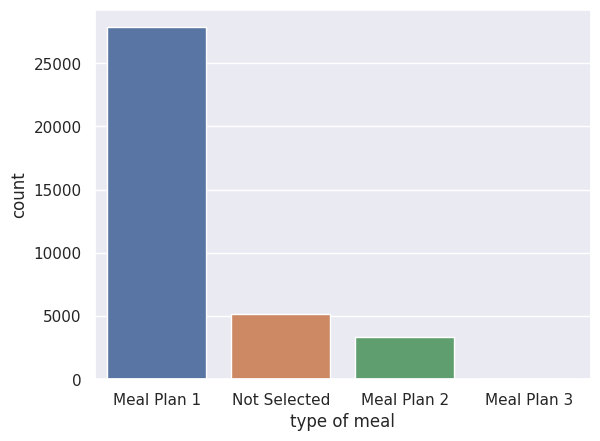

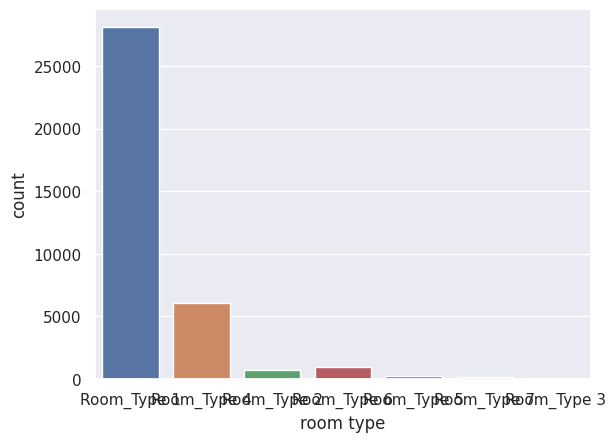

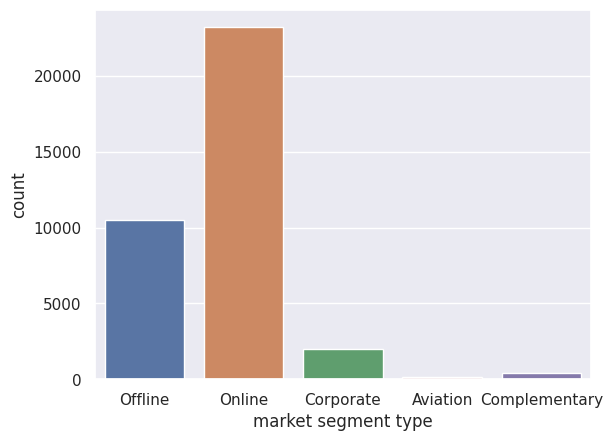

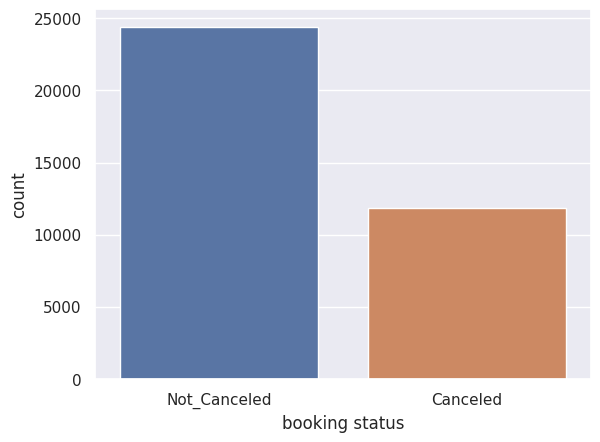

In [62]:
for col in categorical_columns:
    sns.countplot(data = df , x =col)
    plt.show()

In [63]:
df.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price ', 'special requests', 'booking status',
       'year of reservation', 'month of reservation', 'day of reservation'],
      dtype='object')

In [64]:
continuous_cols=['lead time','average price ']

discrete_cols=['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type',  'market segment type', 'repeated', 'P-C','year of reservation', 'month of reservation', 'day of reservation','P-not-C',
        'special requests']

In [65]:
for col in discrete_cols:
    print(df[col].value_counts())
    print("-------------------------")
    print(' ')

number of adults
2    26110
1     7702
3     2318
0      139
4       16
Name: count, dtype: int64
-------------------------
 
number of children
0     33583
1      1622
2      1058
3        19
9         2
10        1
Name: count, dtype: int64
-------------------------
 
number of weekend nights
0    16876
1    10000
2     9072
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64
-------------------------
 
number of week nights
2     11447
1      9488
3      7842
4      2992
0      2387
5      1616
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64
-------------------------
 
type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64
-------------------------
 
car parking space
0    35161
1     1124
Name: count, dtype: int64
-------------------------
 
room type
Room_Type 1

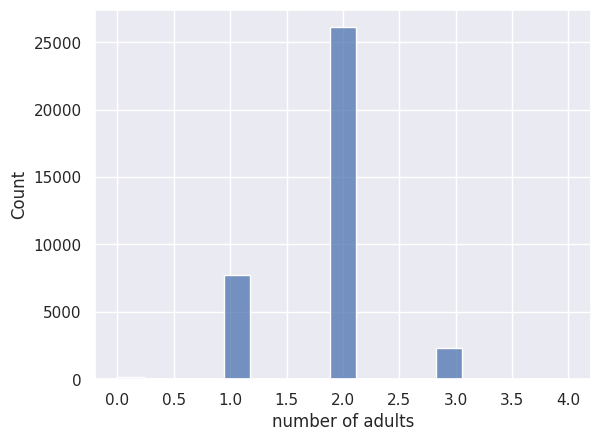

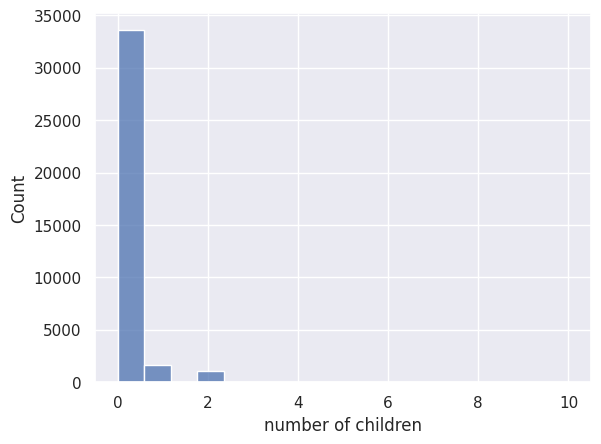

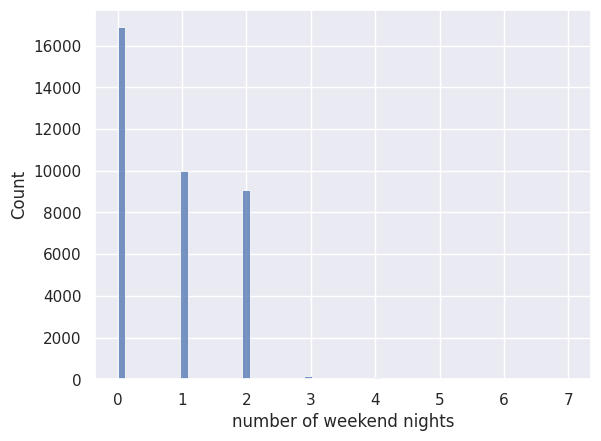

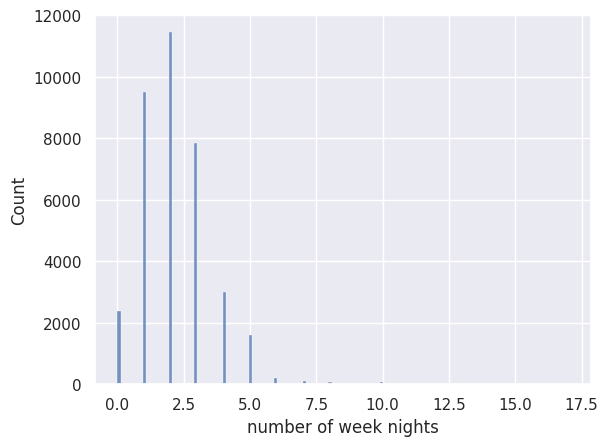

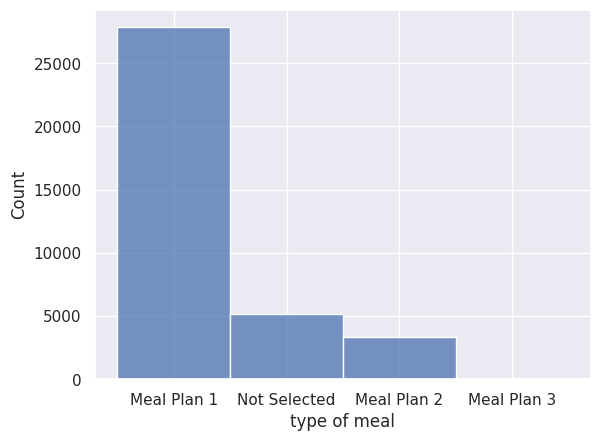

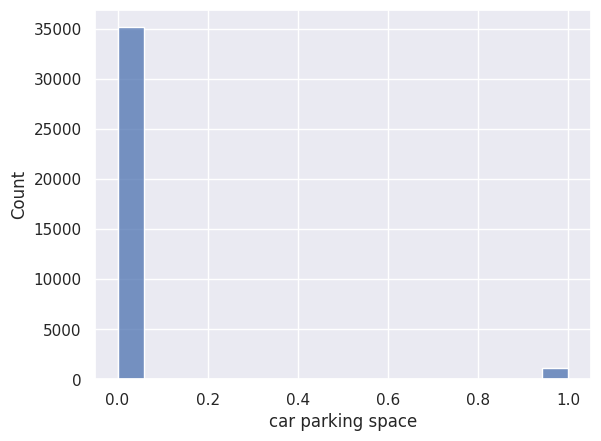

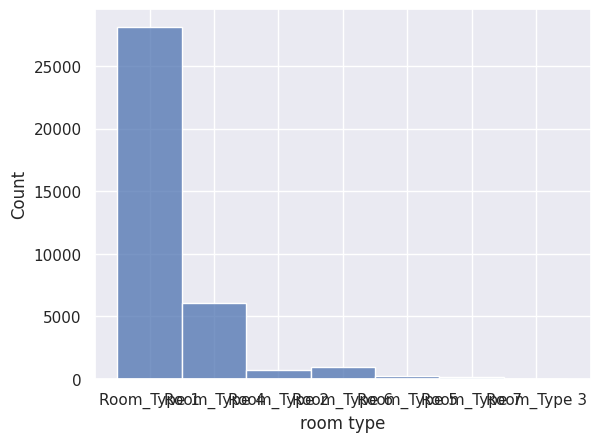

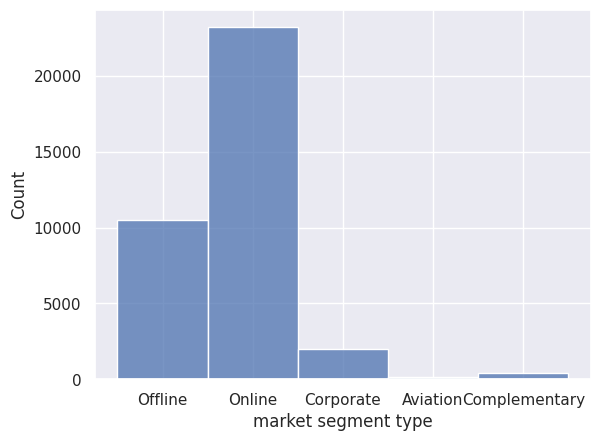

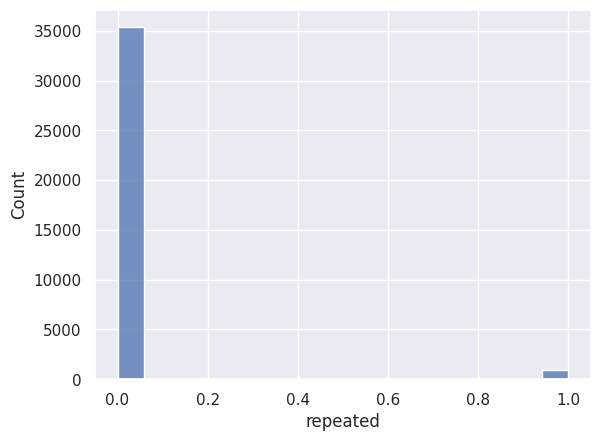

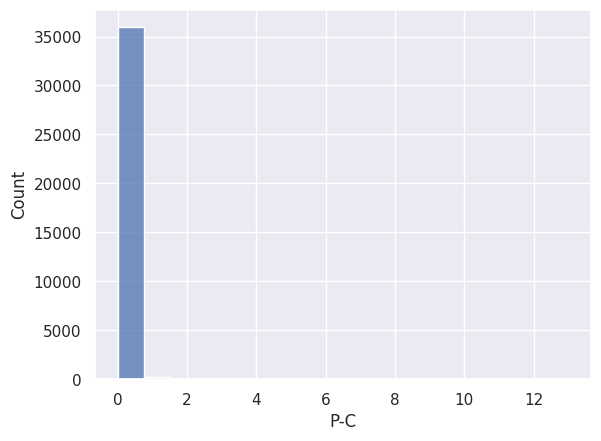

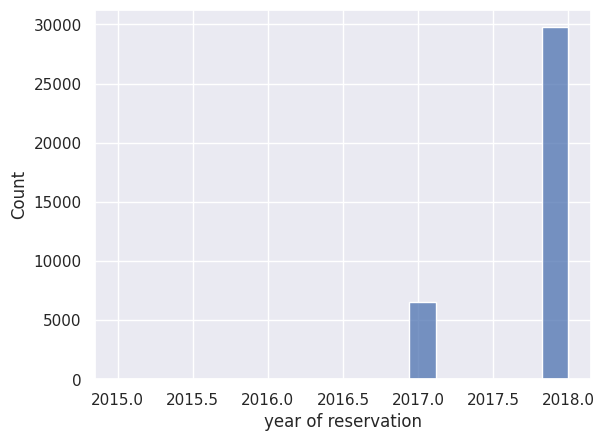

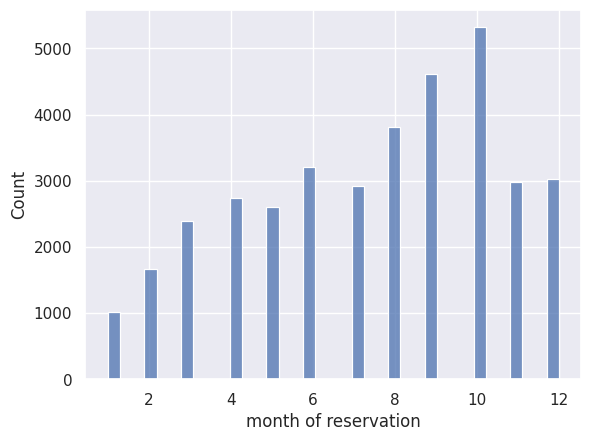

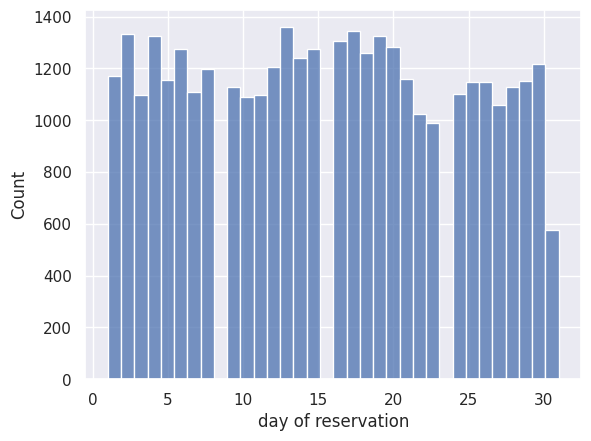

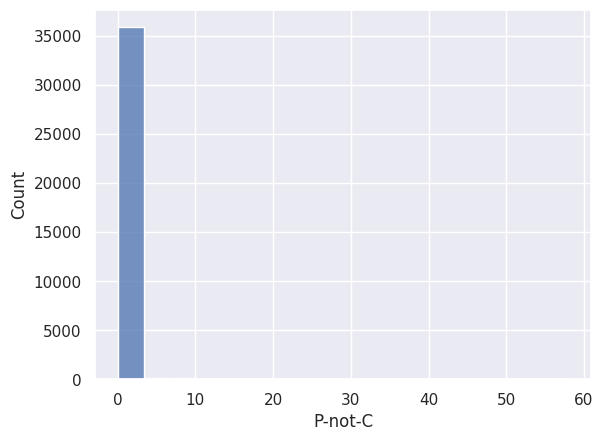

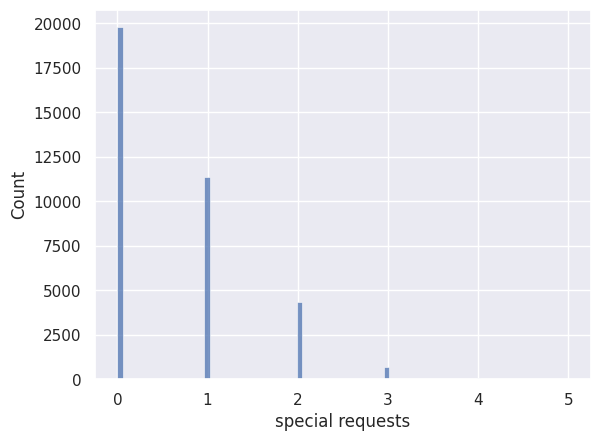

In [66]:
for col in discrete_cols:
    sns.histplot(data = df , x =col)
    plt.show()



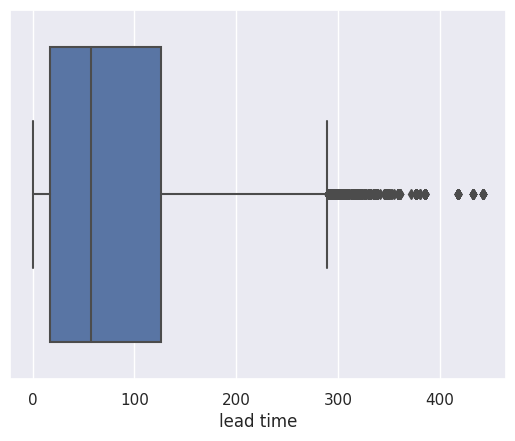

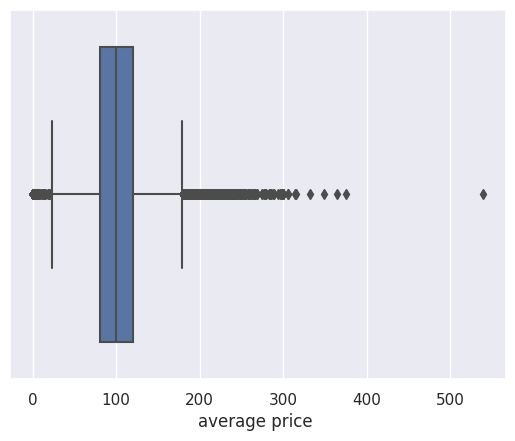

In [67]:
#outliars
for col in continuous_cols:
    sns.boxplot(data = df , x =col)
    plt.show()

In [68]:
for col in continuous_cols:
    print(df[col].quantile([0.7,0.8,0.9,0.95,0.99,0.995,0.999,1]))
    print("-------------------------")
    print(' ')
    

0.700    108.0
0.800    151.0
0.900    213.0
0.950    273.0
0.990    346.0
0.995    377.0
0.999    433.0
1.000    443.0
Name: lead time, dtype: float64
-------------------------
 
0.700    116.00000
0.800    129.00000
0.900    147.59000
0.950    165.00000
0.990    208.00000
0.995    224.67000
0.999    265.31504
1.000    540.00000
Name: average price , dtype: float64
-------------------------
 


In [69]:
def outliers_handling(x, p1=0.25, p2=0.75):
    q1= x.quantile(p1)
    q3= x.quantile(p2)

    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr

    return x[(x > min_limit) & (x < max_limit)]

In [70]:
for col in continuous_cols:
    df[col] = outliers_handling(df[col])

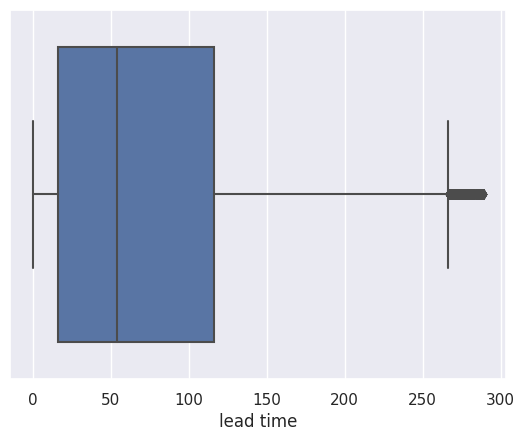

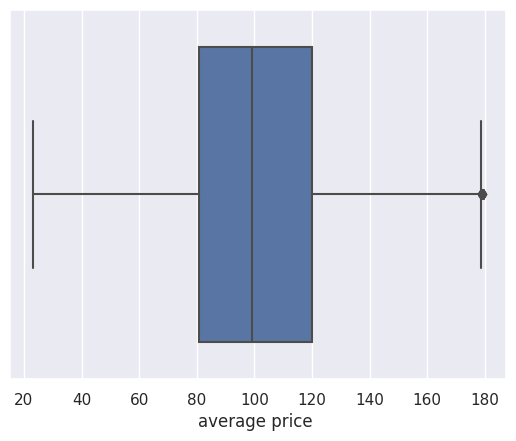

In [71]:
for col in continuous_cols:
    sns.boxplot(data = df , x =col)
    plt.show()

In [72]:
#ُEncoding
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()
for col in categorical_columns:
    df[col]= lb_encoder.fit_transform(df[col])


In [78]:
for col in categorical_columns:
    print(df[col].value_counts())
    print("-------------------------")
    print(' ')

type of meal
0    27842
3     5132
1     3306
2        5
Name: count, dtype: int64
-------------------------
 
room type
0    28138
3     6059
5      966
1      692
4      265
6      158
2        7
Name: count, dtype: int64
-------------------------
 
market segment type
4    23221
3    10531
2     2017
1      391
0      125
Name: count, dtype: int64
-------------------------
 
booking status
1    24396
0    11889
Name: count, dtype: int64
-------------------------
 


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  int64  
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  int64  
 7   lead time                 34953 non-null  float64
 8   market segment type       36285 non-null  int64  
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             34589 non-null  float64
 13  special requests          36285 non-null  int64  
 14  bookin

In [75]:
x = df.drop(['booking status'], axis = 1)
y =  df['booking status']

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [77]:
#Scaling
robust_scaler = RobustScaler()

x_train = robust_scaler.fit_transform(x_train)
x_test=robust_scaler.fit_transform(x_test)